<a href="https://colab.research.google.com/github/Framos22/-MLA_FR/blob/main/MLA2_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
          usage_kwh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%           

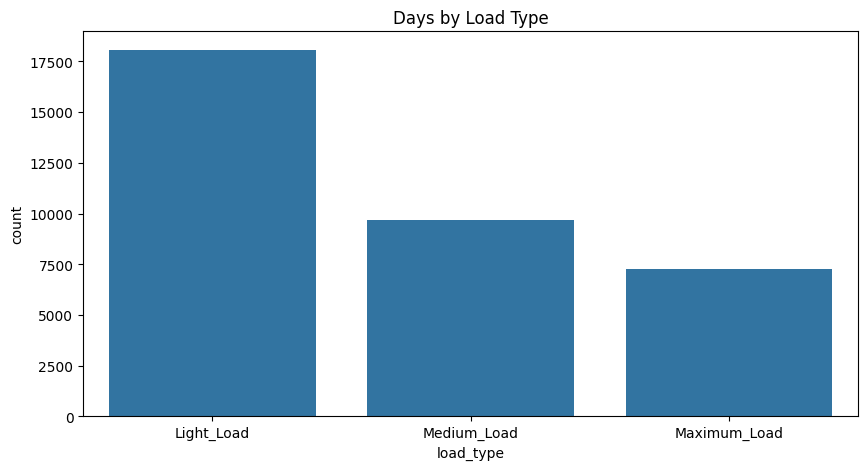

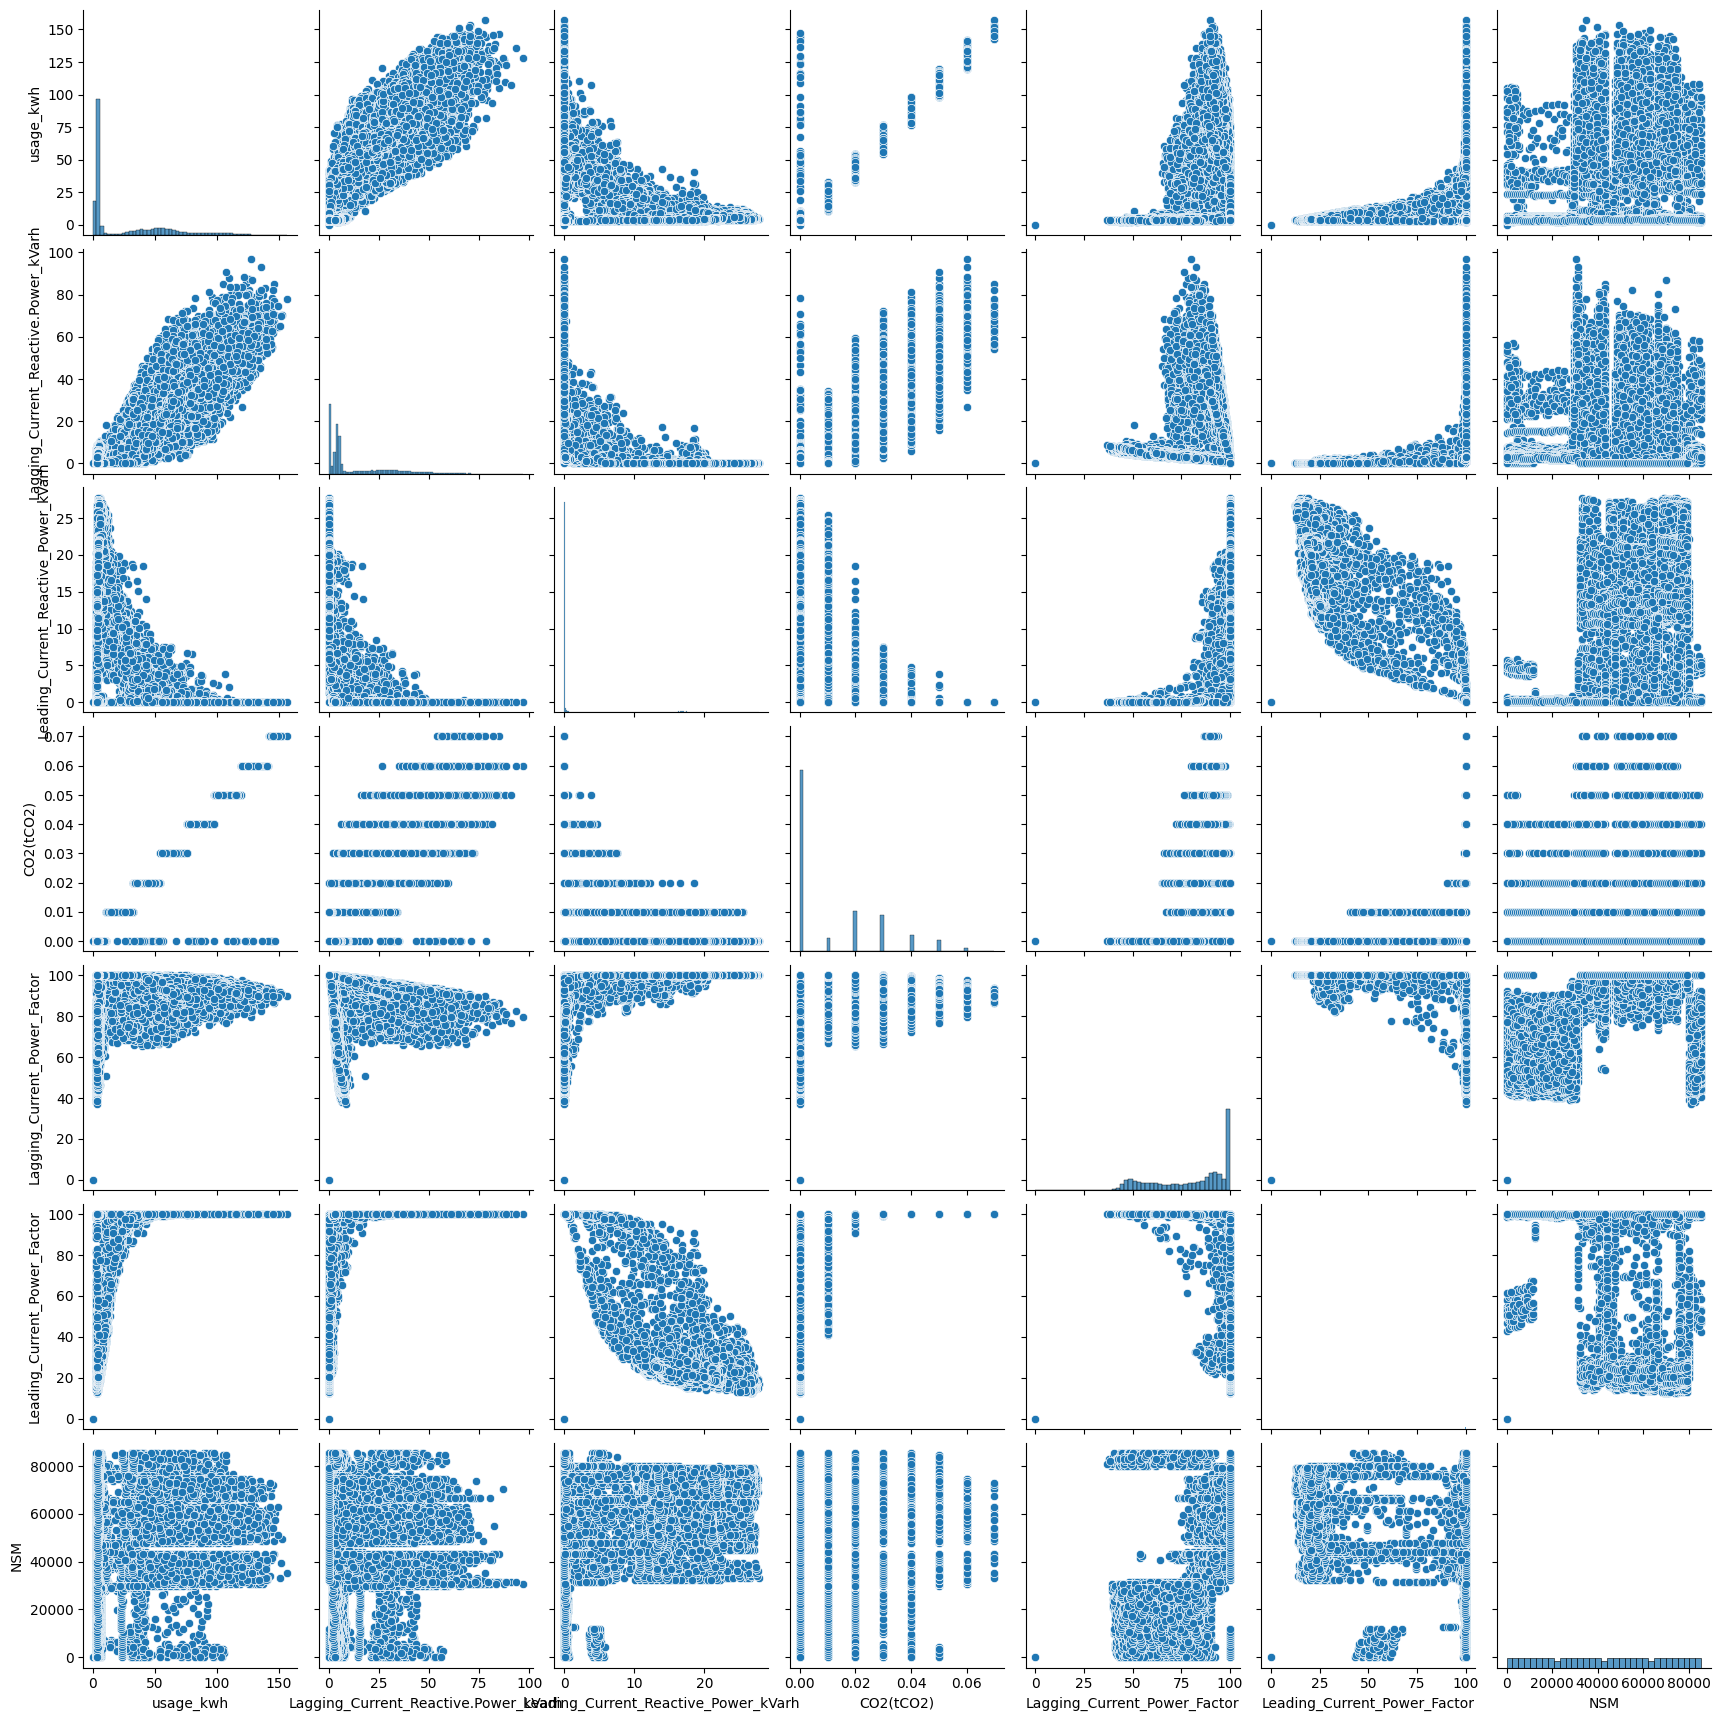

Train RMSE: 4.785832575403094
Test RMSE: 4.22401220201467
R-squared: 0.9843037490428131
Intercept: -10.61918611237925
Coefficients: [-1.39006406e-02  1.39006406e-02 -1.55506940e-01 -1.36341692e-01
 -1.40020893e-01  1.53921534e-01 -2.19683806e-01  5.72722964e-01
 -7.50911673e-02 -1.04700642e+00  2.77328377e-01  7.69678047e-01
  3.17262028e+01  1.96727632e+00  1.15067949e+02  1.21859850e+01
  6.07039277e+00 -2.45728214e-01]
Precision: 0.7754087848669445
Recall: 0.9623955431754875
F1 Score: 0.8588423295454546


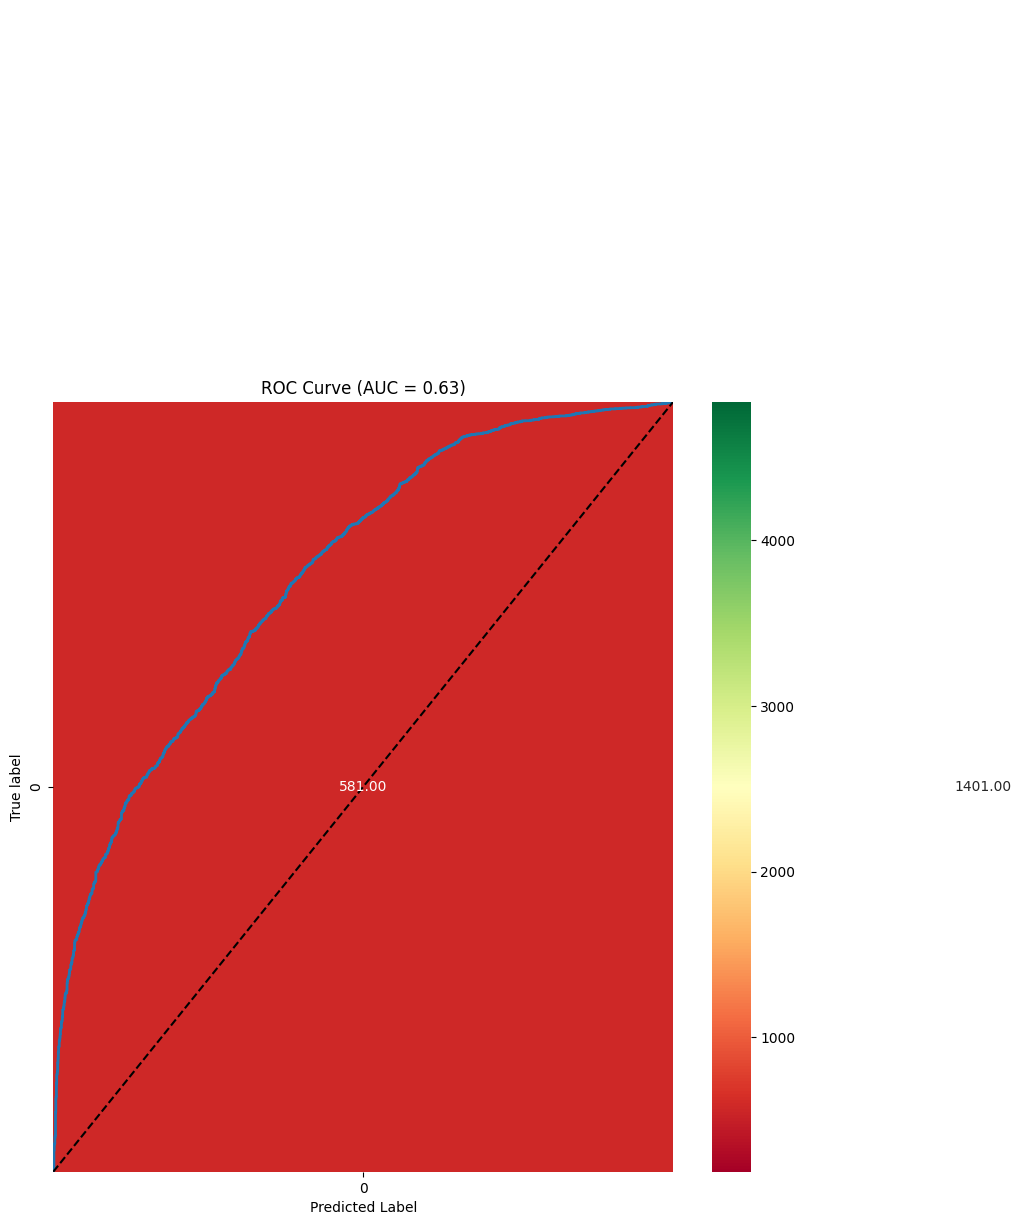

'\nThis model is good for guessing Weekday or Weekend if the AUC number is high like above .9 then it is doing well. \nAnythign lower might not be suitable\n\n'

In [3]:
#Machine Learning Assignment
#Felix Ramos

# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

# Imports for specific models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Imports for Splitting Data and Building Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Confusion Matrix Function
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

# Problem 1
# Reading the Data
df = pd.read_csv('/content/gdrive/MyDrive/Steel_industry_data.csv')
# Rename columns according to Table 1 (assuming Table 1 is provided; example renaming below)
df = df.rename(columns={
    'Date': 'date',
    'Usage_kWh': 'usage_kwh',
    'Load_Type': 'load_type',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    # Add other renamings as per Table 1
})

# Statistical and Visual Exploration
# Summarize numerical columns
print(df.describe())

# Get counts of load types and save to a dataframe
load_type_counts = df['load_type'].value_counts().reset_index()
load_type_counts.columns = ['load_type', 'count']

# Barplot of load types
plt.figure(figsize=(10, 5))
sns.barplot(x='load_type', y='count', data=load_type_counts)
plt.title('Days by Load Type')
plt.show()

# Pairplot of numerical variables
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()

"""
When looking at the pairplot:
- the numbers are related, for example if we see the kwh's go up then we can assume number like power usage will increase as well. Power usage should go up also
- TDepending on the load the data might show some interesting dots
"""

# Splitting Data into Train/Test
X = df.drop(columns=['date', 'usage_kwh'])
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Pipeline
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', MinMaxScaler(), numerical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Executing the Model
pipeline.fit(X_train, y_train)

# Evaluating the Model
y_pred = pipeline.predict(X_test)

# RMSE for train and test
train_pred = pipeline.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

"""
The RMSE will show us if there is a tye of descrpeency associated with how far off the data is.
"""

# R-squared for test
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

"""
The data shown based on the R-squared model explains the kWh usage. 1 means that the model is good. 0 and the model is not cathcing the patterns as expected
"""


# Intercept and coefficients
print(f"Intercept: {pipeline.named_steps['regressor'].intercept_}")
print(f"Coefficients: {pipeline.named_steps['regressor'].coef_}")

# Conclusion
"""
Based on the data the model has given, I think think this will work fine for estimating the kWh usage.
"""

# Problem 2
# Logistic Regression - Acquire Data
df['week_status'] = df['week_status'].map({'Weekday': 1, 'Weekend': 0})

# Splitting Data into Train/Test
X = df.drop(columns=['date', 'week_status', 'day_of_week'])
y = df['week_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Pipeline
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', MinMaxScaler(), numerical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Executing the Model
pipeline.fit(X_train, y_train)

# Evaluating the Model
y_pred = pipeline.predict(X_test)

# Confusion Matrix
plot_cm(y_test, y_pred)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

"""
Precision 3ill show if the guesses were correct
Recall will show how the model is performing
F1 is a micture of the two
"""

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)
plot_roc_curve(fpr, tpr)
plt.title(f"ROC Curve (AUC = {roc_auc:.2f})")
plt.show()

"""
I like the ROC Curve because based on the info it shows the weekdays and the weekends.
"""

# Conclusion
"""
This model is good for guessing Weekday or Weekend if the AUC number is high like above .9 then it is doing well.
Anythign lower might not be suitable

"""